In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models

In [69]:
import os
import random
import cv2
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv("full_df.csv")
df.sample(5)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
95,114,48,Male,114_left.jpg,114_right.jpg,spotted membranous change，spotted membranous c...,normal fundus,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",114_right.jpg
2669,4081,37,Female,4081_left.jpg,4081_right.jpg,moderate non proliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4081_right.jpg
835,968,68,Female,968_left.jpg,968_right.jpg,hypertensive retinopathy,hypertensive retinopathy,0,0,0,0,0,1,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['H'],"[0, 0, 0, 0, 0, 1, 0, 0]",968_right.jpg
100,119,59,Male,119_left.jpg,119_right.jpg,cataract,drusen,0,0,0,1,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['O'],"[0, 0, 0, 0, 0, 0, 0, 1]",119_right.jpg
5422,3111,60,Male,3111_left.jpg,3111_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",3111_left.jpg


In [71]:
img_dir = r'C:\Users\KIIT\Documents\Deep Learning\preprocessed_images'

In [72]:
df = df.iloc[:,1:7]
df.head()

,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords
0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus
1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus
2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy
3,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy
4,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy


In [73]:
s1 = df['Left-Diagnostic Keywords']
print(s1)

0                                                cataract
1                                           normal fundus
2       laser spot，moderate non proliferative retinopathy
3                             macular epiretinal membrane
4                  moderate non proliferative retinopathy
                              ...                        
6387                  severe nonproliferative retinopathy
6388               moderate non proliferative retinopathy
6389                    mild nonproliferative retinopathy
6390                    mild nonproliferative retinopathy
6391    hypertensive retinopathy，age-related macular d...
Name: Left-Diagnostic Keywords, Length: 6392, dtype: object


In [74]:
s2 = df['Right-Diagnostic Keywords']
s2

0                                           normal fundus
1                                           normal fundus
2                  moderate non proliferative retinopathy
3                       mild nonproliferative retinopathy
4                  moderate non proliferative retinopathy
                              ...                        
6387                   proliferative diabetic retinopathy
6388               moderate non proliferative retinopathy
6389                                        normal fundus
6390                    mild nonproliferative retinopathy
6391    hypertensive retinopathy，age-related macular d...
Name: Right-Diagnostic Keywords, Length: 6392, dtype: object

In [75]:
for i in range(6392):
    if 'hyper' in s1[i]:
        s1[i] = 'Hypertension'

<ipython-input-75-1ca3283a23bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s1[i] = 'Hypertension'


In [76]:
for i in range(6392):
    if 'hyper' in s2[i]:
        s2[i] = 'Hypertension'

<ipython-input-76-066c76739248>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s2[i] = 'Hypertension'


In [77]:
df.sample(10)

,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords
4784,53,Female,2413_left.jpg,2413_right.jpg,normal fundus,normal fundus
5538,53,Female,3235_left.jpg,3235_right.jpg,normal fundus,normal fundus
3053,67,Male,4522_left.jpg,4522_right.jpg,low image quality,severe nonproliferative retinopathy
5928,52,Male,4158_left.jpg,4158_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy
1251,62,Female,1607_left.jpg,1607_right.jpg,pathological myopia,pathological myopia
2725,57,Female,4146_left.jpg,4146_right.jpg,normal fundus,moderate non proliferative retinopathy
6094,42,Male,4333_left.jpg,4333_right.jpg,normal fundus,mild nonproliferative retinopathy
3062,60,Male,4532_left.jpg,4532_right.jpg,mild nonproliferative retinopathy,moderate non proliferative retinopathy
2330,47,Male,3217_left.jpg,3217_right.jpg,normal fundus,normal fundus
1352,67,Male,1994_left.jpg,1994_right.jpg,cataract，myelinated nerve fibers，moderate non ...,mild nonproliferative retinopathy


In [78]:
df_left_hyp = df[df['Left-Diagnostic Keywords'] == 'Hypertension']
df_left_hyp.head()

,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords
10,60,Female,11_left.jpg,11_right.jpg,Hypertension,Hypertension
19,47,Male,23_left.jpg,23_right.jpg,Hypertension,Hypertension
23,63,Female,28_left.jpg,28_right.jpg,Hypertension,Hypertension
26,64,Female,32_left.jpg,32_right.jpg,Hypertension,Hypertension
36,54,Male,45_left.jpg,45_right.jpg,Hypertension,Hypertension


In [79]:
len(df_left_hyp)

191

In [80]:
df_rt_hyp = df[df['Right-Diagnostic Keywords'] == 'Hypertension']
df_rt_hyp.head()

,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords
10,60,Female,11_left.jpg,11_right.jpg,Hypertension,Hypertension
19,47,Male,23_left.jpg,23_right.jpg,Hypertension,Hypertension
23,63,Female,28_left.jpg,28_right.jpg,Hypertension,Hypertension
26,64,Female,32_left.jpg,32_right.jpg,Hypertension,Hypertension
36,54,Male,45_left.jpg,45_right.jpg,Hypertension,Hypertension


In [81]:
len(df_rt_hyp)

194

In [82]:
df_hyp_filenames = df_left_hyp['Left-Fundus'].append(df_rt_hyp['Right-Fundus'], ignore_index=True)
df_hyp_filenames.head()

0    11_left.jpg
1    23_left.jpg
2    28_left.jpg
3    32_left.jpg
4    45_left.jpg
dtype: object

In [83]:
len(df_hyp_filenames)

385

(512, 512, 3)
783_left.jpg


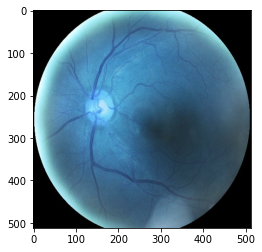

In [84]:
img = df_hyp_filenames[34]
image = cv2.imread(os.path.join(img_dir, img))
plt.imshow(image)
print(image.shape)
print(img)

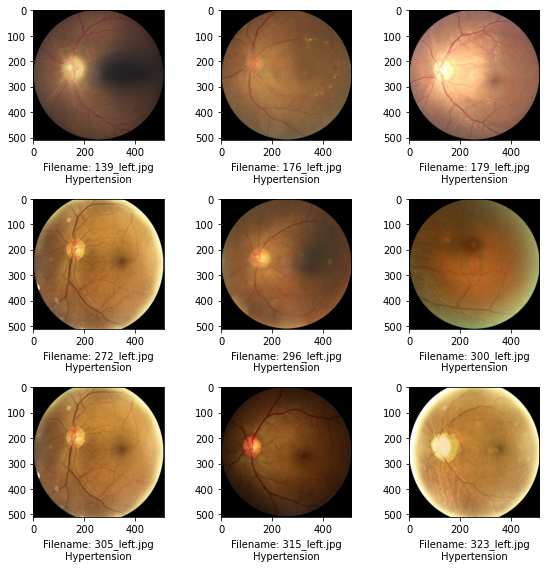

In [85]:
plt.figure(figsize=(8,8))
for i in range(9):
    img = df_hyp_filenames[i+9]
    image = cv2.imread(os.path.join(img_dir, img))
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(3,3,i+1)
    plt.imshow(image_rgb)
    plt.xlabel('Filename: {}\n''Hypertension'.format(df_hyp_filenames[i+9]))
    
plt.tight_layout()

In [86]:
df_left_nor = df[df['Left-Diagnostic Keywords'] == 'normal fundus']
df_left_nor.head()

,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords
1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus
7,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus
8,54,Male,9_left.jpg,9_right.jpg,normal fundus,vitreous degeneration
12,55,Male,14_left.jpg,14_right.jpg,normal fundus,macular epiretinal membrane
13,50,Male,15_left.jpg,15_right.jpg,normal fundus,myelinated nerve fibers


In [87]:
df_rt_nor = df[df['Right-Diagnostic Keywords'] == 'normal fundus']
df_rt_nor.head()

,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords
0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus
1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus
7,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus
9,70,Male,10_left.jpg,10_right.jpg,epiretinal membrane,normal fundus
24,59,Male,29_left.jpg,29_right.jpg,epiretinal membrane,normal fundus


In [88]:
df_nor_filenames = df_left_nor['Left-Fundus'].append(df_rt_nor['Right-Fundus'],ignore_index=True)
df_nor_filenames

0           1_left.jpg
1           8_left.jpg
2           9_left.jpg
3          14_left.jpg
4          15_left.jpg
             ...      
5496    4642_right.jpg
5497    4644_right.jpg
5498    4660_right.jpg
5499    4671_right.jpg
5500    4689_right.jpg
Length: 5501, dtype: object

In [89]:
df_nor_filenames = df_nor_filenames.sample(400)
df_nor_filenames = df_nor_filenames.reset_index(drop=True)
df_nor_filenames.head()

0     3156_left.jpg
1    3250_right.jpg
2      606_left.jpg
3    4506_right.jpg
4    2940_right.jpg
dtype: object

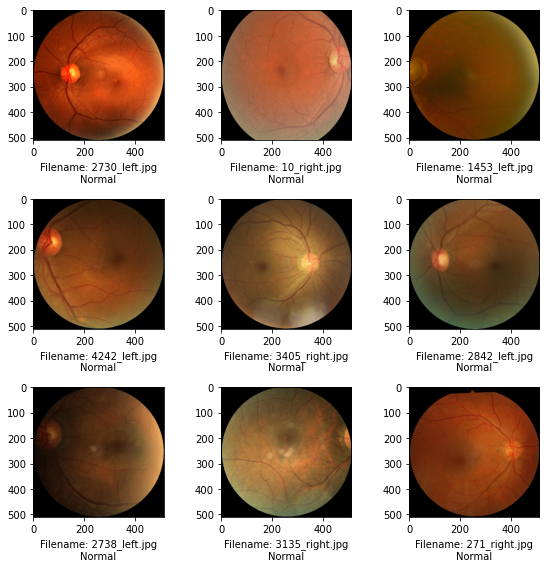

In [90]:
# Grid images of normal eye

plt.figure(figsize=(8,8))
for i in range(9):
    img = df_nor_filenames[i+9]
    image = cv2.imread(os.path.join(img_dir, img))
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(3,3,i+1)
    plt.imshow(image_rgb)
    plt.xlabel('Filename: {}\n''Normal'.format(df_nor_filenames[i+9]))
    
plt.tight_layout()

In [91]:
df_hyp_filenames = pd.DataFrame(df_hyp_filenames, columns = ["filename"])
df_hyp_filenames["label"] = "Hypertension"
df_hyp_filenames.head()

,filename,label
0,11_left.jpg,Hypertension
1,23_left.jpg,Hypertension
2,28_left.jpg,Hypertension
3,32_left.jpg,Hypertension
4,45_left.jpg,Hypertension


In [92]:
df_nor_filenames = pd.DataFrame(df_nor_filenames, columns = ["filename"])
df_nor_filenames["label"] = "normal"
df_nor_filenames.head()

,filename,label
0,3156_left.jpg,normal
1,3250_right.jpg,normal
2,606_left.jpg,normal
3,4506_right.jpg,normal
4,2940_right.jpg,normal


In [93]:
df_combined = df_hyp_filenames.append(df_nor_filenames,ignore_index = True)
df_combined

,filename,label
0,11_left.jpg,Hypertension
1,23_left.jpg,Hypertension
2,28_left.jpg,Hypertension
3,32_left.jpg,Hypertension
4,45_left.jpg,Hypertension
...,...,...
780,2883_left.jpg,normal
781,3219_left.jpg,normal
782,740_left.jpg,normal
783,2628_right.jpg,normal


In [94]:
df_combined = df_combined.sample(785)
df_combined = df_combined.reset_index(drop=True)
df_combined

,filename,label
0,3213_right.jpg,normal
1,4562_right.jpg,Hypertension
2,3135_right.jpg,normal
3,2822_right.jpg,normal
4,983_right.jpg,Hypertension
...,...,...
780,2518_right.jpg,normal
781,759_left.jpg,Hypertension
782,2365_right.jpg,normal
783,3371_right.jpg,normal


In [95]:
a  = np.array(df_combined.filename)

In [96]:
a.shape

(785,)

In [97]:
paths = []
type(paths)

list

In [98]:
for i in range(785):
    img = a[i]
    image = os.path.join(img_dir, img)
    paths.append(image)

In [99]:
paths

['C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\3213_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\4562_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\3135_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\2822_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\983_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\365_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\2097_left.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\139_left.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\2548_right.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\2052_left.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\97_left.jpg',
 'C:\\Users\\KIIT\\Documents\\Deep Learning\\preprocessed_images\\1048_right.jpg',
 'C:\\Users\\

In [100]:
data = []

In [101]:
for i in range(785):
    img = paths[i]
    image = cv2.imread(img)
    image = cv2.resize(image,(224,224))
    data.append(image)

In [102]:
len(data)

785

In [103]:
data = np.array(data)

## Scaling the Data in the range of 0 to 1

In [104]:
data = data/255

In [105]:
x = data
y = []
for i in df_combined.label:
    if(i=='Hypertension'):
        y.append(1)
    else:
        y.append(0)
y = np.array(y)

In [106]:
len(x)

785

In [107]:
len(y)

785

## Splitting the Data into the test,train,val

In [108]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.2)
x_val,x_test,y_val,y_test = train_test_split(x_val,y_val,test_size=0.5)

print(len(x_train))
print(len(x_val))
print(len(x_test))

628
78
79


### Data Augmentation

In [109]:
from tensorflow.keras import layers

In [110]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(224,224,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [111]:
from tensorflow.keras.models import Sequential

In [112]:
num_classes = 2

model = models.Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
    
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation = 'softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(x_train, y_train, epochs=30)

Epoch 1/30


C:\Users\KIIT\anaconda3\lib\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


20/20 [==============================] - 27s 1s/step - loss: 0.9364 - accuracy: 0.5143
Epoch 2/30
20/20 [==============================] - 25s 1s/step - loss: 0.6923 - accuracy: 0.5573
Epoch 3/30
20/20 [==============================] - 26s 1s/step - loss: 0.6906 - accuracy: 0.5573
Epoch 4/30
20/20 [==============================] - 26s 1s/step - loss: 0.6882 - accuracy: 0.5016
Epoch 5/30
20/20 [==============================] - 25s 1s/step - loss: 0.6852 - accuracy: 0.5016
Epoch 6/30
20/20 [==============================] - 26s 1s/step - loss: 0.6768 - accuracy: 0.5366
Epoch 7/30
20/20 [==============================] - 26s 1s/step - loss: 0.6681 - accuracy: 0.5780
Epoch 8/30
20/20 [==============================] - 25s 1s/step - loss: 0.6913 - accuracy: 0.5175
Epoch 9/30
20/20 [==============================] - 25s 1s/step - loss: 0.6874 - accuracy: 0.5271
Epoch 10/30
20/20 [==============================] - 25s 1s/step - loss: 0.6823 - accuracy: 0.5303
Epoch 11/30
20/20 [===========

KeyboardInterrupt: 

Interrupted the execution in between as it was not giving the good accuracy after 20 epochs, so decided to go for pretrained model.

# Transfer Learning 

### MobileNet V2 Model

In [114]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [115]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [116]:
num_of_classes = 2

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [128]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
20/20 [==============================] - 22s 963ms/step - loss: 0.2184 - accuracy: 0.9411
Epoch 2/10
20/20 [==============================] - 19s 967ms/step - loss: 0.2032 - accuracy: 0.9554
Epoch 3/10
20/20 [==============================] - 19s 965ms/step - loss: 0.1971 - accuracy: 0.9586
Epoch 4/10
20/20 [==============================] - 19s 966ms/step - loss: 0.1990 - accuracy: 0.9475
Epoch 5/10
20/20 [==============================] - 19s 970ms/step - loss: 0.1900 - accuracy: 0.9697
Epoch 6/10
20/20 [==============================] - 19s 967ms/step - loss: 0.1888 - accuracy: 0.9570
Epoch 7/10
20/20 [==============================] - 19s 968ms/step - loss: 0.1801 - accuracy: 0.9666
Epoch 8/10
20/20 [==============================] - 19s 967ms/step - loss: 0.1768 - accuracy: 0.9618
Epoch 9/10
20/20 [==============================] - 19s 968ms/step - loss: 0.1742 - accuracy: 0.9602
Epoch 10/10
20/20 [==============================] - 19s 964ms/step - loss: 0.1763 - accura

In [129]:
model.evaluate(x_val,y_val)

3/3 [==============================] - 3s 719ms/step - loss: 0.4643 - accuracy: 0.8462


[0.46431466937065125, 0.8461538553237915]

In [130]:
model.evaluate(x_test,y_test)

3/3 [==============================] - 2s 721ms/step - loss: 0.3900 - accuracy: 0.7975


[0.39002832770347595, 0.797468364238739]

In [131]:
y_pre = model.predict(x_test)
y_pred = [np.argmax(i) for i in y_pre]
y_pred[:10]

[0, 1, 1, 0, 0, 1, 0, 0, 1, 1]

In [132]:
from sklearn.metrics import classification_report

In [133]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.92      0.80        36
           1       0.91      0.70      0.79        43

    accuracy                           0.80        79
   macro avg       0.81      0.81      0.80        79
weighted avg       0.82      0.80      0.80        79



## EfficientNet B4 Model

In [126]:
model1 = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/tensorflow/efficientnet/b4/feature-vector/1",
                   trainable=False,input_shape=(224, 224, 3)),  
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [127]:
num_of_classes = 2

model1 = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_classes)
])

model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [134]:
model1.compile(
  optimizer="nadam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model1.fit(x_train, y_train, epochs=10)

Epoch 1/10
20/20 [==============================] - 22s 971ms/step - loss: 0.6915 - accuracy: 0.5971
Epoch 2/10
20/20 [==============================] - 19s 964ms/step - loss: 0.5849 - accuracy: 0.6831
Epoch 3/10
20/20 [==============================] - 19s 970ms/step - loss: 0.5404 - accuracy: 0.7404
Epoch 4/10
20/20 [==============================] - 19s 965ms/step - loss: 0.5013 - accuracy: 0.7532
Epoch 5/10
20/20 [==============================] - 19s 967ms/step - loss: 0.4650 - accuracy: 0.7962
Epoch 6/10
20/20 [==============================] - 19s 966ms/step - loss: 0.4406 - accuracy: 0.8105
Epoch 7/10
20/20 [==============================] - 19s 968ms/step - loss: 0.4231 - accuracy: 0.8328
Epoch 8/10
20/20 [==============================] - 19s 970ms/step - loss: 0.4043 - accuracy: 0.8296
Epoch 9/10
20/20 [==============================] - 19s 970ms/step - loss: 0.3942 - accuracy: 0.8376
Epoch 10/10
20/20 [==============================] - 19s 965ms/step - loss: 0.3741 - accura

In [135]:
model1.evaluate(x_val,y_val)

3/3 [==============================] - 3s 716ms/step - loss: 0.4909 - accuracy: 0.7821


[0.490852028131485, 0.7820512652397156]

# VGG-16 Model

In [136]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential
from keras import layers,models
from keras.layers import Flatten,Dense
from keras.models import Model

In [137]:
IMAGE_SIZE = [224,224]
vgg = VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

In [138]:
for layers in vgg.layers:
    layers.trainable = False

In [139]:
x = Flatten()(vgg.output)

In [140]:
prediction = Dense(2,activation = 'softmax')(x)

In [141]:
model2 = Model(inputs = vgg.input, outputs = prediction) 

In [142]:
model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [143]:
model2.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [159]:
model2.fit(x_train,y_train,epochs=10)

Epoch 1/10
20/20 [==============================] - 181s 9s/step - loss: 0.4065 - accuracy: 0.8137
Epoch 2/10
20/20 [==============================] - 176s 9s/step - loss: 0.3774 - accuracy: 0.8408
Epoch 3/10
20/20 [==============================] - 171s 9s/step - loss: 0.2840 - accuracy: 0.8662
Epoch 4/10
20/20 [==============================] - 166s 8s/step - loss: 0.2781 - accuracy: 0.8949
Epoch 5/10
20/20 [==============================] - 170s 9s/step - loss: 0.5032 - accuracy: 0.7723
Epoch 6/10
20/20 [==============================] - 172s 9s/step - loss: 0.1592 - accuracy: 0.9522
Epoch 7/10
20/20 [==============================] - 175s 9s/step - loss: 0.1544 - accuracy: 0.9522
Epoch 8/10
20/20 [==============================] - 172s 9s/step - loss: 0.1674 - accuracy: 0.9347
Epoch 9/10
20/20 [==============================] - 179s 9s/step - loss: 0.1402 - accuracy: 0.9682
Epoch 10/10
20/20 [==============================] - 173s 9s/step - loss: 0.3535 - accuracy: 0.8678


## ResNet-50 Model

In [145]:
num_classes = 2
model3 = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/tensorflow/resnet_50/classification/1",
                   trainable=False,input_shape=(224, 224, 3)),  
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [146]:
model3 = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_classes)
])

model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [152]:
model3.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model3.fit(x_train, y_train, epochs=10)

Epoch 1/10
20/20 [==============================] - 12s 537ms/step - loss: 0.3766 - accuracy: 0.8376
Epoch 2/10
20/20 [==============================] - 14s 686ms/step - loss: 0.3539 - accuracy: 0.8599
Epoch 3/10
20/20 [==============================] - 14s 690ms/step - loss: 0.3336 - accuracy: 0.8822
Epoch 4/10
20/20 [==============================] - 14s 703ms/step - loss: 0.3325 - accuracy: 0.8710
Epoch 5/10
20/20 [==============================] - 14s 717ms/step - loss: 0.3089 - accuracy: 0.8981
Epoch 6/10
20/20 [==============================] - 15s 737ms/step - loss: 0.2995 - accuracy: 0.9061
Epoch 7/10
20/20 [==============================] - 15s 744ms/step - loss: 0.2940 - accuracy: 0.8997
Epoch 8/10
20/20 [==============================] - 15s 763ms/step - loss: 0.2908 - accuracy: 0.9013
Epoch 9/10
20/20 [==============================] - 15s 758ms/step - loss: 0.2777 - accuracy: 0.9204
Epoch 10/10
20/20 [==============================] - 16s 809ms/step - loss: 0.2677 - accura

In [153]:
model3.evaluate(x_val,y_val)

3/3 [==============================] - 2s 375ms/step - loss: 0.4569 - accuracy: 0.7949


[0.45687299966812134, 0.7948718070983887]

In [154]:
model3.evaluate(x_test,y_test)

3/3 [==============================] - 1s 361ms/step - loss: 0.4336 - accuracy: 0.7595


[0.43364328145980835, 0.7594936490058899]

In [155]:
y_pre = model3.predict(x_val)
y_pred = [np.argmax(i) for i in y_pre]
y_pred[:10]

[1, 0, 0, 0, 0, 0, 0, 0, 1, 1]

In [157]:
y_val[:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [158]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        41
           1       0.80      0.76      0.78        37

    accuracy                           0.79        78
   macro avg       0.80      0.79      0.79        78
weighted avg       0.80      0.79      0.79        78

